## ```Imports```
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ```EDA```
---
1. Getting dataframe insights to see which features have have predictive power.

In [2]:
fraud = pd.read_csv('../Fraud-Project/SmallBalancedClasses.csv')

In [3]:
fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,day,month
0,2020-02-19 20:12:08,3551217896304745,fraud_Metz-Boehm,shopping_pos,5.66,F,Tupper Lake,NY,12986,44.2320,-74.4905,6120,Chartered loss adjuster,1976-10-09,44.014358,-74.843835,0,20,19,2
1,2020-05-22 20:09:36,675990301623,fraud_Jast Ltd,shopping_net,8.01,F,Ogdensburg,NJ,7439,41.0767,-74.5982,2456,Senior tax professional/tax inspector,1994-03-13,40.104592,-74.161150,0,20,22,5
2,2019-11-23 23:55:11,30029052116970,"fraud_Koss, Hansen and Lueilwitz",home,70.15,M,Falconer,NY,14733,42.1239,-79.1895,3833,Metallurgist,1970-10-09,42.868719,-79.558973,0,23,23,11
3,2019-11-30 21:27:34,213198837352314,fraud_Nolan-Williamson,kids_pets,50.76,M,Garfield,KS,67529,38.0649,-99.2374,365,Equality and diversity officer,1991-02-03,38.133819,-99.250579,0,21,30,11
4,2019-03-11 23:56:59,5388659976630693,fraud_Wilkinson Ltd,entertainment,4.66,M,Seneca,WI,54654,43.2064,-90.9405,153,Quantity surveyor,1962-02-14,43.502012,-90.279663,0,23,11,3


In [4]:
fraud.groupby('gender')['amt'].mean()

gender
F    269.631019
M    332.608705
Name: amt, dtype: float64

In [5]:
fraud[fraud['is_fraud']==1]['gender'].value_counts(normalize=True)

M    0.502398
F    0.497602
Name: gender, dtype: float64

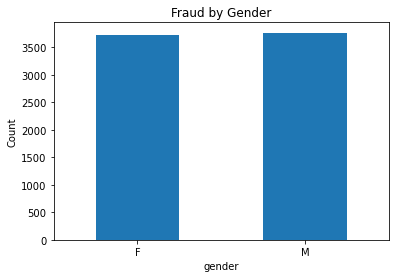

In [6]:
fraud.groupby('gender')['is_fraud'].sum().plot(kind='bar')
plt.title('Fraud by Gender')
plt.xticks(rotation=1)
plt.ylabel('Count');

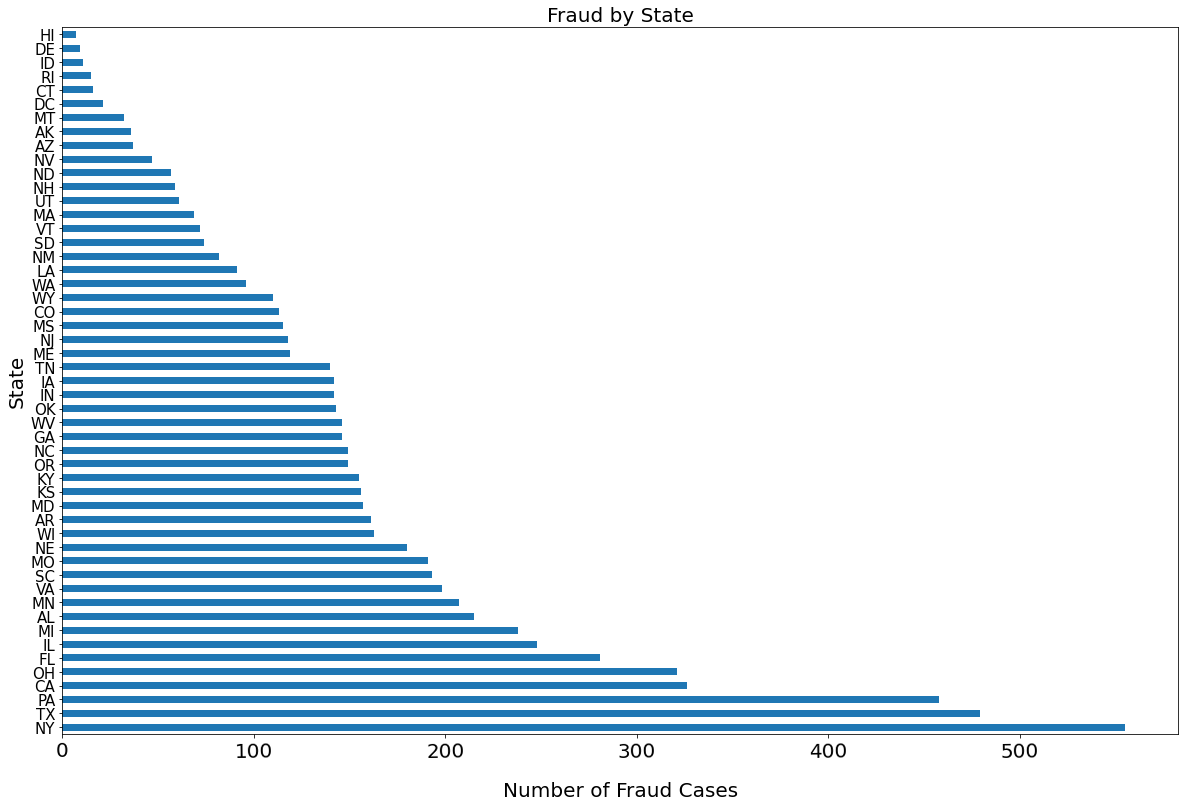

In [18]:
fraud.groupby('state')['is_fraud'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(20,13))
plt.title('Fraud by State', fontsize=20)
plt.xticks(rotation=1, fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('State',fontsize=20)
plt.xlabel('Number of Fraud Cases', fontsize=20, labelpad=20);

**The top 5 states for fraud are New York, Texas, Pennsylvania, California, and Ohio.**

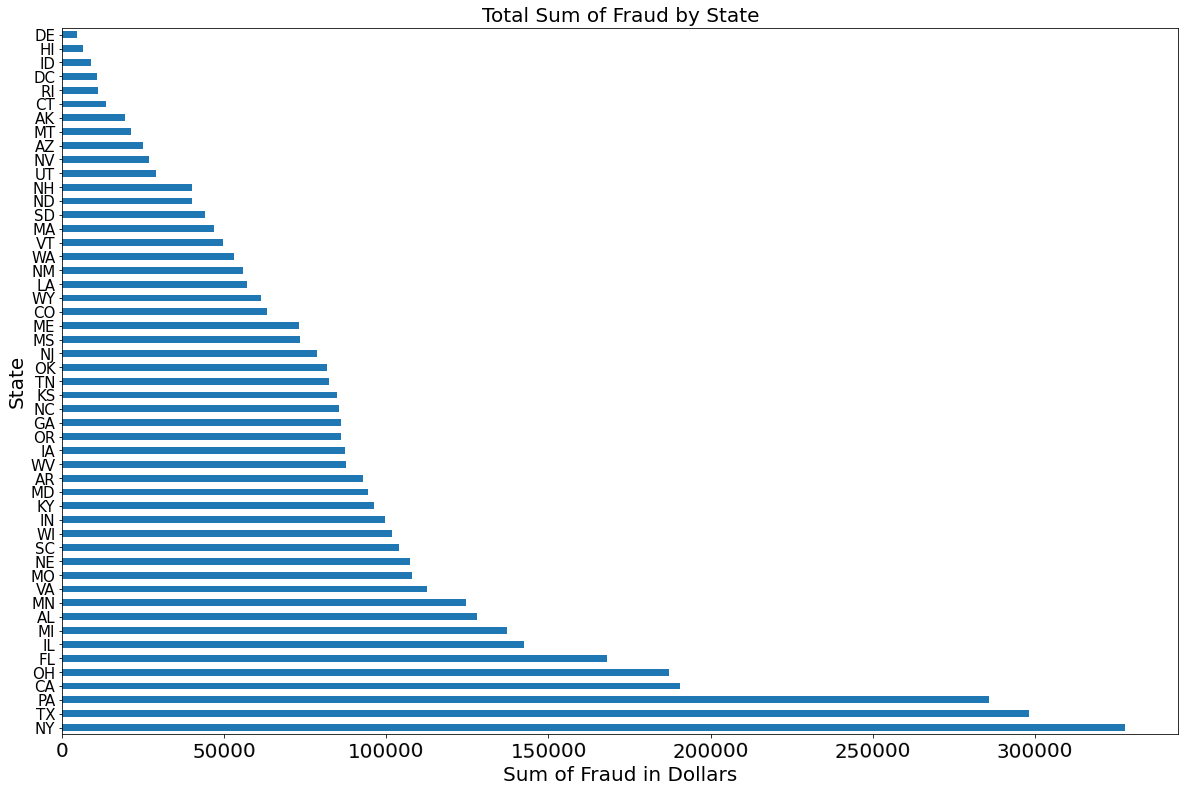

In [17]:
fraud.groupby('state')['amt'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(20,13))
plt.title('Total Sum of Fraud by State',fontsize=20)
plt.xticks(rotation=1, fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('State', fontsize=20)
plt.xlabel('Sum of Fraud in Dollars',fontsize=20);

**The top 5 states for Sum of fraud are New York, Texas, Pennsylvania, California, and Ohio. These are also the top 5 states with most frequent fraud cases.**

In [9]:
fraud[fraud['zip']==82514]['is_fraud'].value_counts()

1    21
0    12
Name: is_fraud, dtype: int64

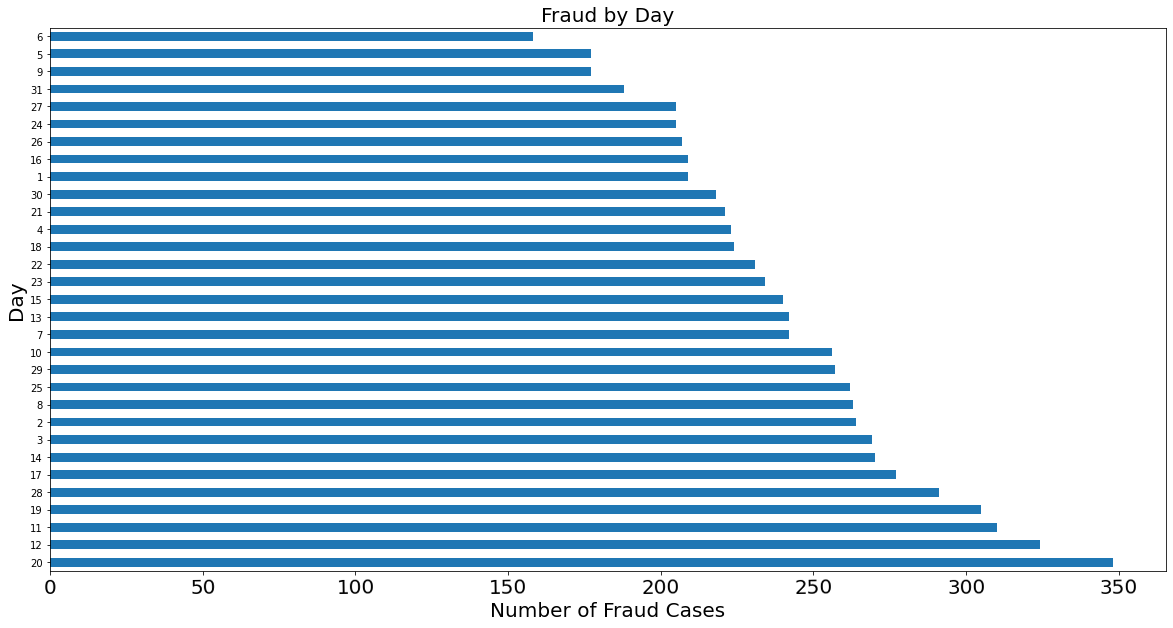

In [11]:
fraud.groupby('day')['is_fraud'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(20,10))
plt.title('Fraud by Day', fontsize=20)
plt.xticks(rotation=1,fontsize=20)
plt.ylabel('Day', fontsize=20)
plt.xlabel('Number of Fraud Cases',fontsize=20);

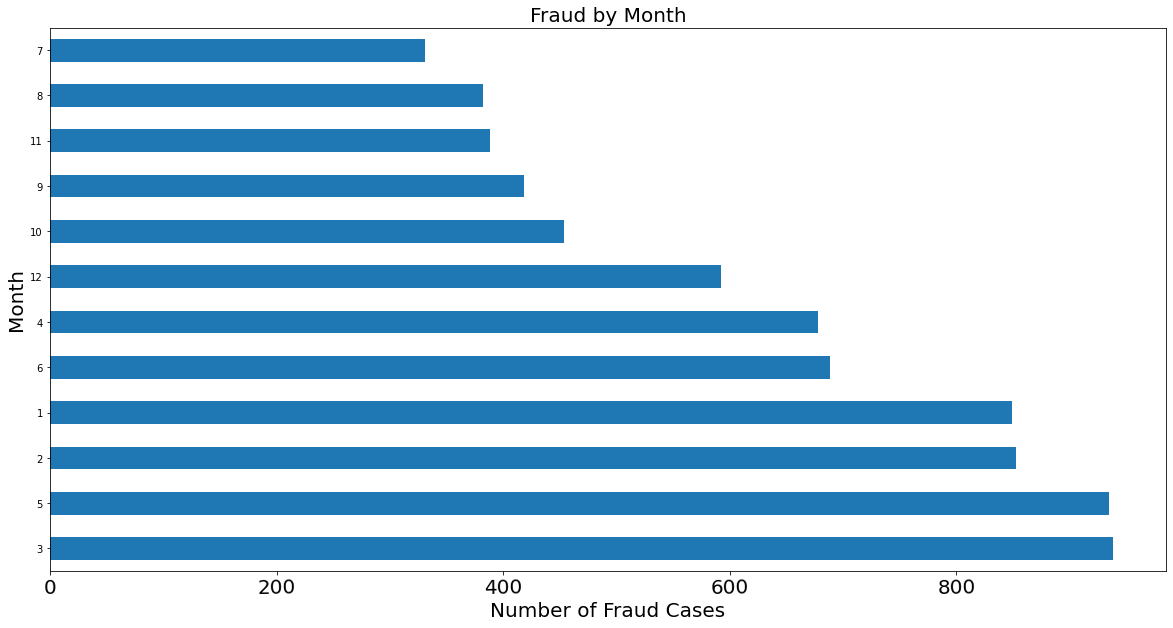

In [10]:
fraud.groupby('month')['is_fraud'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(20,10))
plt.title('Fraud by Month', fontsize=20)
plt.xticks(rotation=1,fontsize=20)
plt.ylabel('Month', fontsize=20)
plt.xlabel('Number of Fraud Cases',fontsize=20);

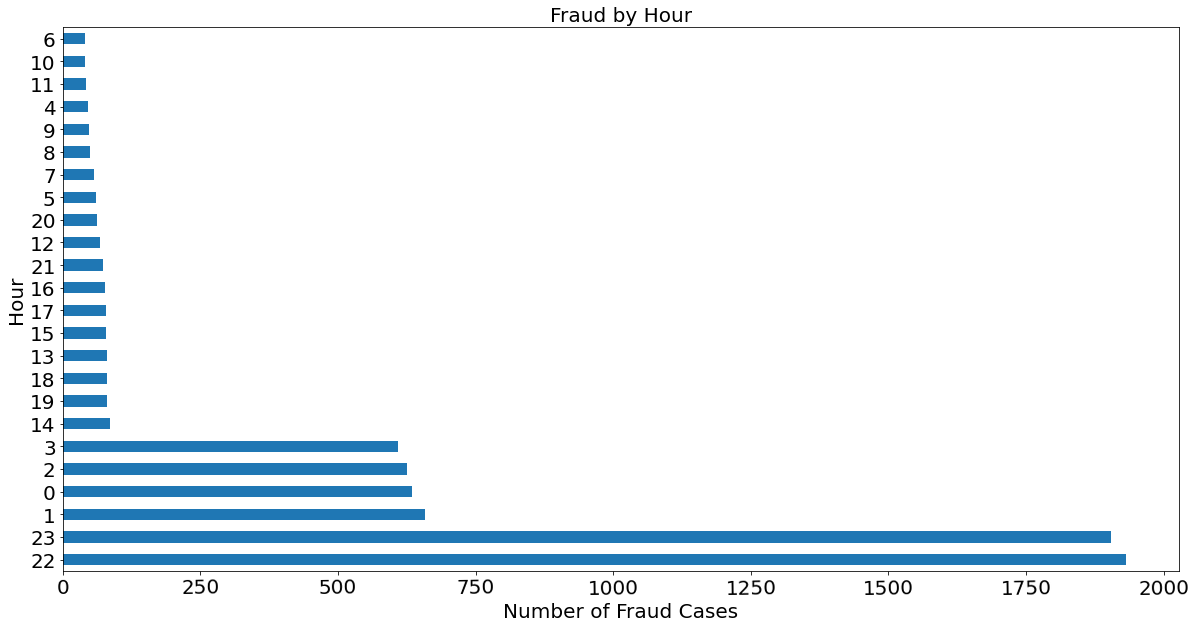

In [13]:
fraud.groupby('hour')['is_fraud'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(20,10))
plt.title('Fraud by Hour', fontsize=20)
plt.xticks(rotation=1,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Hour', fontsize=20)
plt.xlabel('Number of Fraud Cases',fontsize=20);

**Most fraud cases happen between 10pm-4am.**

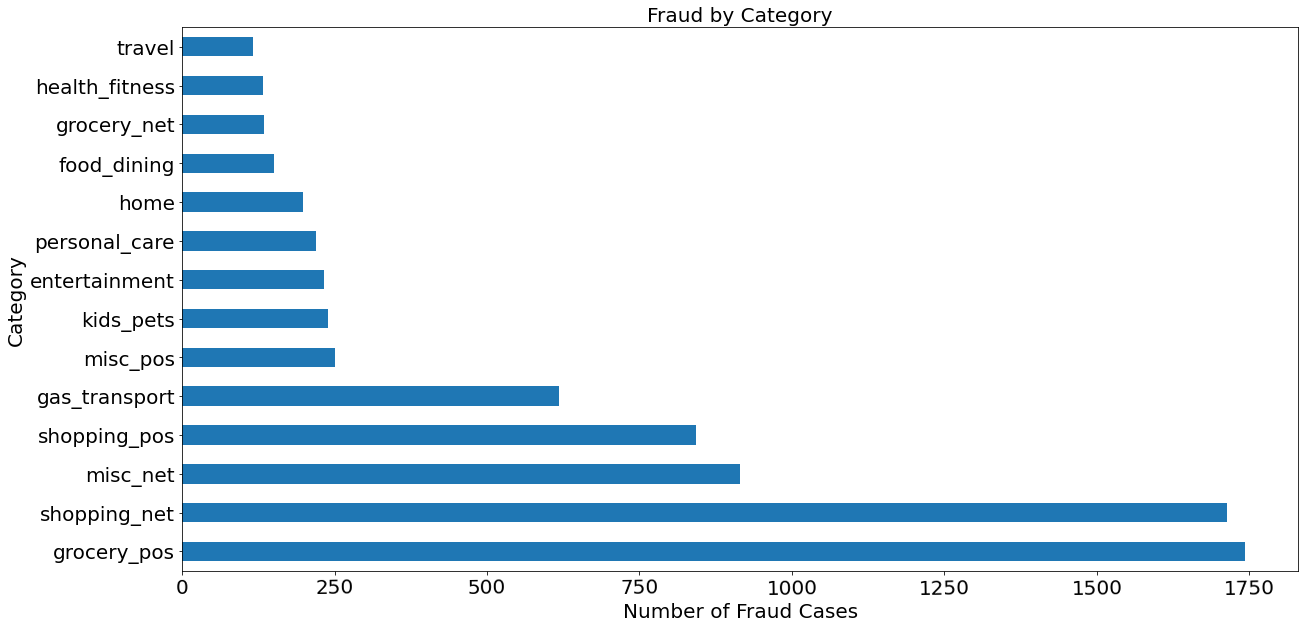

In [12]:
fraud.groupby('category')['is_fraud'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(20,10))
plt.title('Fraud by Category', fontsize=20)
plt.xticks(rotation=1, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Category', fontsize=20)
plt.xlabel('Number of Fraud Cases', fontsize=20);

**Most fraud cases are shopping_net (online shopping) and grocery_pos (grocery with card at point of sale).**

In [12]:
fraud[fraud['merchant']=='fraud_Kuhn LLC']['category'].value_counts()

shopping_pos    43
misc_net        26
Name: category, dtype: int64

In [13]:
fraud[fraud['category']=='grocery_pos']['job'].value_counts()

Trading standards officer    22
Mechanical engineer          21
Naval architect              19
Exhibition designer          17
Producer, radio              16
                             ..
Manufacturing engineer        1
Ship broker                   1
Veterinary surgeon            1
Administrator, arts           1
Teacher, primary school       1
Name: job, Length: 458, dtype: int64

In [14]:
fraud.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour
count,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000
mean,4.116061e+17,299.142826,48536.222422,38.597969,-90.153831,9.465576e+04,38.587773,-90.157656,0.500000,14.474754
std,1.296647e+18,369.171521,27141.832326,5.104814,14.071088,3.163972e+05,5.141105,14.084716,0.500017,8.389713
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,19.093881,-166.550779,0.000000,1.000000
25%,1.800312e+14,20.297500,25213.000000,34.882900,-96.809400,7.410000e+02,34.919930,-96.929459,0.000000,6.000000
50%,3.521417e+15,88.625000,47515.000000,39.405500,-86.992000,2.518000e+03,39.411434,-87.187037,0.500000,16.000000
75%,4.634956e+15,486.715000,71832.000000,41.846700,-80.124800,2.047800e+04,41.945082,-80.119993,1.000000,23.000000
max,4.992346e+18,3250.050000,99783.000000,66.693300,-67.950300,2.906700e+06,67.510267,-66.993669,1.000000,24.000000


In [19]:
fraud[fraud['state']=='NY'].shape

(1020, 18)

In [39]:
fraud['state'].value_counts()[:5]

NY    1020
TX    1001
PA     892
CA     696
OH     593
Name: state, dtype: int64

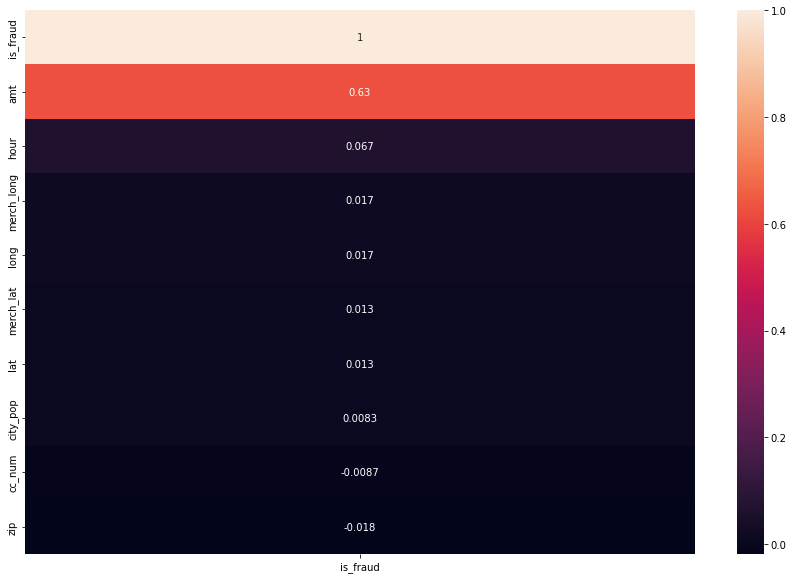

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(fraud.corr()[['is_fraud']].sort_values(by='is_fraud',ascending=False),annot=True);

**We can see that there is moderately strong correlation between the amount of a purchase and whether the purchase is a fraudlent.**